In [29]:
import numpy as np

from sympy import * 

def rref(A, tol=1.0e-12):
    m, n = A.shape
    i, j = 0, 0
    jb = []

    while i < m and j < n:
        # Find value and index of largest element in the remainder of column j
        k = np.argmax(np.abs(A[i:m, j])) + i
        p = np.abs(A[k, j])
        if p <= tol:
            # The column is negligible, zero it out
            A[i:m, j] = 0.0
            j += 1
        else:
            # Remember the column index
            jb.append(j)
            if i != k:
                # Swap the i-th and k-th rows
                A[[i, k], j:n] = A[[k, i], j:n]
            # Divide the pivot row i by the pivot element A[i, j]
            A[i, j:n] = A[i, j:n] / A[i, j]
            # Subtract multiples of the pivot row from all the other rows
            for k in range(m):
                if k != i:
                    A[k, j:n] -= A[k, j] * A[i, j:n]
            i += 1
            j += 1
    # Finished
    return A

In [67]:
N=10
K=5
T_max = 15
is_print = False

N_trial = 5000
T_array = np.array(range(1,T_max+1))
partial_sum_array = np.zeros((len(T_array),N_trial))

for j in range(len(T_array)):
    
    T = T_array[j]
    print('T=',T)
    for i in range(N_trial):
        P = []
        # print(len(P))
        while(len(P)<T):
            M = np.random.binomial(1, 0.7, size=(N))
            if np.sum(M) < K:
                continue;
            else:
                result = np.where(M == 1)

            if is_print:
                print('surviving user info:',result[0])
            select = np.random.choice(result[0], K, replace=False)

            tmp = np.zeros(N)
            tmp[select] = 1
            if is_print:
                print('selected user info:',tmp)

            P.append(tmp)

        P = np.array(P)
        # print(P)
        P_rref = rref(P)

        if is_print:
            print(P_rref)
        P_num = np.count_nonzero(np.array(P_rref),axis = 1)
        zero_index = np.where(P_num == 0)
        P_num[zero_index] = N+1

        # result = np.where(P_rref != 0)
        if is_print:
            print(P_num)

        partial_sum = np.min(P_num)
        if is_print:
            print(partial_sum)

        partial_sum_array[j][i] = partial_sum

mean_partial_sum = np.mean(partial_sum_array, axis=1)
print(mean_partial_sum)

T= 1
T= 2
T= 3
T= 4
T= 5
T= 6
T= 7
T= 8
T= 9
T= 10
T= 11
T= 12
T= 13
T= 14
T= 15
[5.     4.4064 3.7632 3.18   2.734  2.4414 2.2358 2.0876 1.9044 1.4762
 1.2222 1.103  1.0478 1.021  1.012 ]


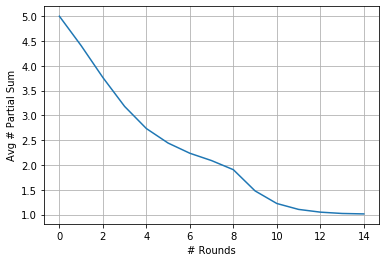

In [68]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

plt.plot(mean_partial_sum)
plt.ylabel('Avg # Partial Sum')
plt.xlabel('# Rounds')
plt.grid()
plt.show()

0.0
0.0
0.0
0.0
0.0002
0.0006
0.0028
0.0178
0.1186
0.5286
0.7794
0.8972
0.9522
0.979
0.988


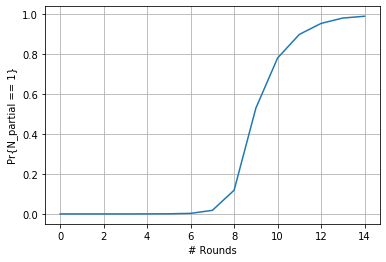

In [75]:
num_is_one = np.zeros(len(T_array))
for i in range(len(T_array)):
    is_one = np.where(partial_sum_array[i,:] == 1)
    
    num_is_one[i] = np.shape(is_one)[1] / N_trial
    print(num_is_one[i])
    
plt.plot(num_is_one)
plt.ylabel('Pr{N_partial == 1}')
plt.xlabel('# Rounds')
plt.grid()
plt.show()

In [79]:
Basis = np.array([[1,1,1,1,1,0,0,0,0,0],[0,0,0,0,0,1,1,1,1,1],[0,0,1,1,1,1,1,0,0,0],[1,1,0,0,0,0,0,1,1,1],[1,0,0,0,1,1,1,0,0,1],[0,1,1,1,0,0,0,1,1,0]])
print(Basis)

Basis_rref = rref(Basis)

print()
print(Basis_rref)

print(len(Basis))

[[1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 1 1 1 1 1 0 0 0]
 [1 1 0 0 0 0 0 1 1 1]
 [1 0 0 0 1 1 1 0 0 1]
 [0 1 1 1 0 0 0 1 1 0]]

[[ 1  0  0  0  1  0  0 -1 -1  0]
 [ 0  1  0  0 -1  0  0  2  2  1]
 [ 0  0  1  1  1  0  0 -1 -1 -1]
 [ 0  0  0  0  0  1  1  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
6


In [90]:
Basis = np.array([[1,1,1,1,1,0,0,0,0,0],[0,0,0,0,0,1,1,1,1,1],[0,0,1,1,1,1,1,0,0,0],[1,1,0,0,0,0,0,1,1,1],[1,0,0,0,1,1,1,0,0,1],[0,1,1,1,0,0,0,1,1,0]])

partial_sum_array_prop = np.zeros((len(T_array),N_trial))

for j in range(len(T_array)):
    
    T = T_array[j]
    print('T=',T)
    for i in range(N_trial):
        
        P = []
        # print(len(P))
        while(len(P)<T):
#             select = np.random.choice(result[0], K, replace=False)
            select = np.random.choice(range(len(Basis)),1,replace=False)
            tmp = Basis[select[0],:]
#             print(tmp)
            P.append(tmp)

        P = np.array(P)
        # print(P)
        P_rref = rref(P)

        if is_print:
            print(P_rref)
        P_num = np.count_nonzero(np.array(P_rref),axis = 1)
        zero_index = np.where(P_num == 0)
        P_num[zero_index] = N+1

        # result = np.where(P_rref != 0)
        if is_print:
            print(P_num)

        partial_sum = np.min(P_num)
        if is_print:
            print(partial_sum)

        partial_sum_array_prop[j][i] = partial_sum

T= 1
T= 2
T= 3
T= 4
T= 5
T= 6
T= 7
T= 8
T= 9
T= 10
T= 11
T= 12
T= 13
T= 14
T= 15


In [91]:
mean_partial_sum_prop = np.mean(partial_sum_array_prop, axis=1)
print(mean_partial_sum_prop)

[5.     4.782  4.6356 4.46   4.3172 4.2042 4.1406 4.0862 4.056  4.0356
 4.0234 4.0148 4.0106 4.0076 4.0042]


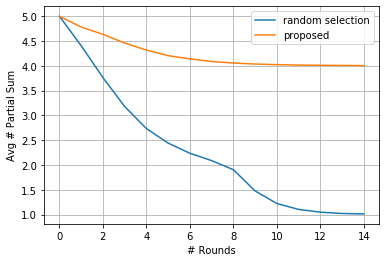

In [93]:
plt.plot(mean_partial_sum,label='random selection')
plt.plot(mean_partial_sum_prop,label='proposed')
plt.ylabel('Avg # Partial Sum')
plt.xlabel('# Rounds')
plt.legend()
plt.grid()
plt.show()